#        Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

#        Reading csv files and gathering info 

In [2]:
train_df=pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head(10)

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0
5,csid_6,9.007922,7.051568,0.161564,0.040997,0.191935,4.209840,3.181961,18.862680,C,BA,0
6,csid_7,13.707109,5.625179,0.009634,-0.019998,0.177622,4.165093,4.689834,109.203352,B,E,0
7,csid_8,32.042122,3.563568,-0.050730,NaN,0.257060,4.366761,4.041260,24.036321,AA,A,0
8,csid_9,20.434181,5.111682,0.133922,0.036893,0.442314,4.759516,3.407424,17.078123,C,BA,0
9,csid_10,13.778214,3.829299,0.159102,0.165818,0.558187,6.255980,3.315462,9.443864,B,BA,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       10738 non-null  object 
 1   customer_visit_score              10738 non-null  float64
 2   customer_product_search_score     10696 non-null  float64
 3   customer_ctr_score                10738 non-null  float64
 4   customer_stay_score               10701 non-null  float64
 5   customer_frequency_score          10738 non-null  float64
 6   customer_product_variation_score  10692 non-null  float64
 7   customer_order_score              10672 non-null  float64
 8   customer_affinity_score           10738 non-null  float64
 9   customer_active_segment           10715 non-null  object 
 10  X1                                10701 non-null  object 
 11  customer_category                 10738 non-null  int64  
dtypes: f

In [4]:
train_df.describe(include = 'all')

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
count,10738,10738.000000,10696.000000,10738.000000,10701.000000,10738.000000,10692.000000,10672.000000,10738.000000,10715,10701,10738.000000
unique,10738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,NaN
top,csid_5797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,BA,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4919,4511,NaN
mean,NaN,19.060941,5.274847,0.175912,0.374230,2.376895,5.788180,3.150071,17.061836,NaN,NaN,0.120600
std,NaN,7.419609,1.882559,0.372829,1.222031,5.601911,2.531309,1.035416,18.762693,NaN,NaN,0.325677
min,NaN,0.568965,-0.161940,-0.547989,-0.462494,0.028575,2.752836,0.363338,-0.486834,NaN,NaN,0.000000
25%,NaN,13.518021,3.971587,0.010840,-0.027666,0.313610,4.193234,2.454017,4.530085,NaN,NaN,0.000000
50%,NaN,18.774109,5.218479,0.074078,0.037201,0.516830,4.842575,3.118394,12.653357,NaN,NaN,0.000000
75%,NaN,24.501719,6.520364,0.159606,0.179029,1.125380,6.286400,3.756566,23.114577,NaN,NaN,0.000000


In [5]:
print(train_df.isna().sum())
print("Duplicate Rows count: ",train_df.duplicated().sum())

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64
Duplicate Rows count:  0


In [6]:
train_df.dtypes

customer_id                          object
customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_stay_score                 float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_active_segment              object
X1                                   object
customer_category                     int64
dtype: object

#    Data Visualisation and Preprocessing 
            Visualising the data and removing or filling the missing values in the column 

####  Data Profiling 

In [7]:
#Pandas Profiling Report
report = ProfileReport(train_df)
report.to_file('Report.html')

In [8]:
# finding the correlation between columns
np.round(train_df.corr(method='pearson', min_periods=1),2)

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
customer_visit_score,1.00,0.27,-0.57,-0.47,-0.21,-0.22,0.17,0.12,-0.45
customer_product_search_score,0.27,1.00,-0.42,-0.41,-0.02,-0.07,0.05,0.04,-0.30
customer_ctr_score,-0.57,-0.42,1.00,0.91,0.42,0.45,-0.34,-0.23,0.79
customer_stay_score,-0.47,-0.41,0.91,1.00,0.40,0.41,-0.31,-0.21,0.68
customer_frequency_score,-0.21,-0.02,0.42,0.40,1.00,0.70,-0.53,-0.33,0.39
customer_product_variation_score,-0.22,-0.07,0.45,0.41,0.70,1.00,-0.69,-0.53,0.49
customer_order_score,0.17,0.05,-0.34,-0.31,-0.53,-0.69,1.00,0.76,-0.39
customer_affinity_score,0.12,0.04,-0.23,-0.21,-0.33,-0.53,0.76,1.00,-0.27
customer_category,-0.45,-0.30,0.79,0.68,0.39,0.49,-0.39,-0.27,1.00


<AxesSubplot:>

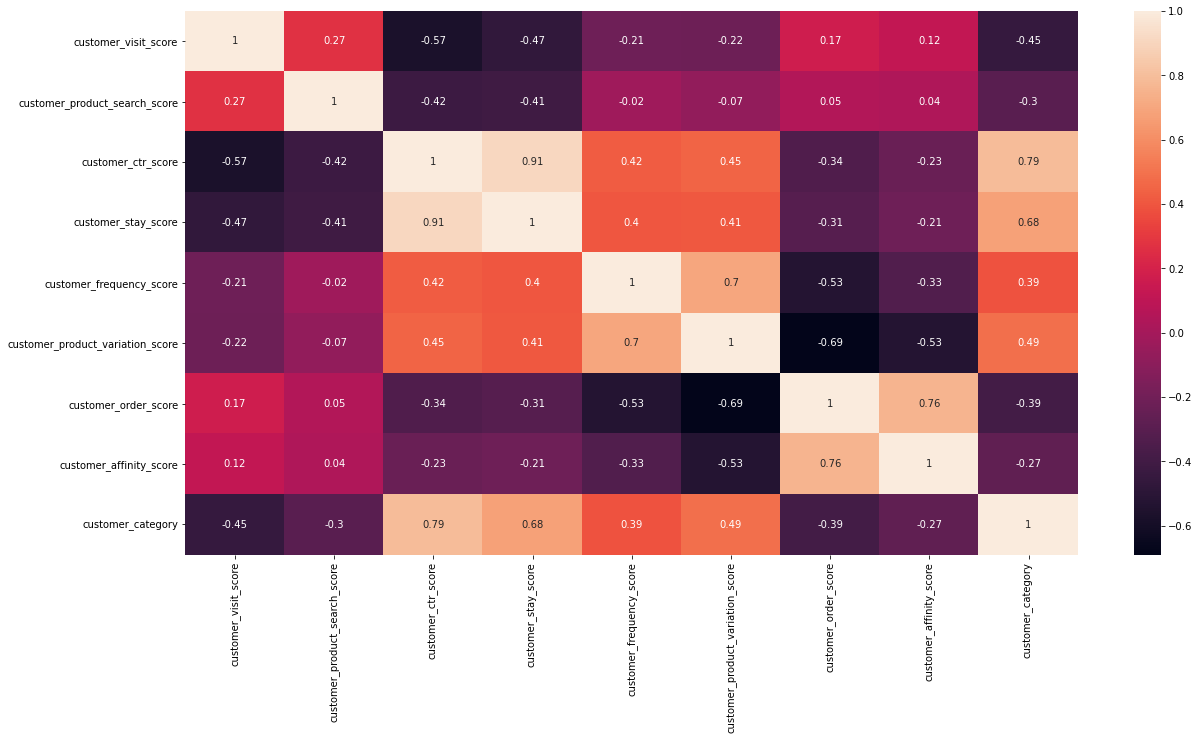

In [9]:
plt.figure(figsize = (20,10))
sns.heatmap(np.round(train_df.corr(method='pearson', min_periods=1),2), annot = True)

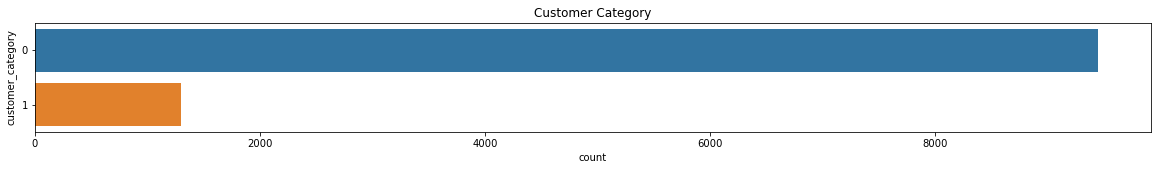

In [10]:
plt.figure(figsize = (20,2))
sns.countplot(y= train_df.customer_category)
plt.title('Customer Category')
plt.show()

As per the above analysis its observed that 
1. customer_ctr_score and customer_stay_score are highly correlated and also (customer_frequency_score & customer_production_variation_score) and (customer_order_score & customer_affinity_score) are also well correlated

2. Customer category =0 count is way more than Customer category  =1 

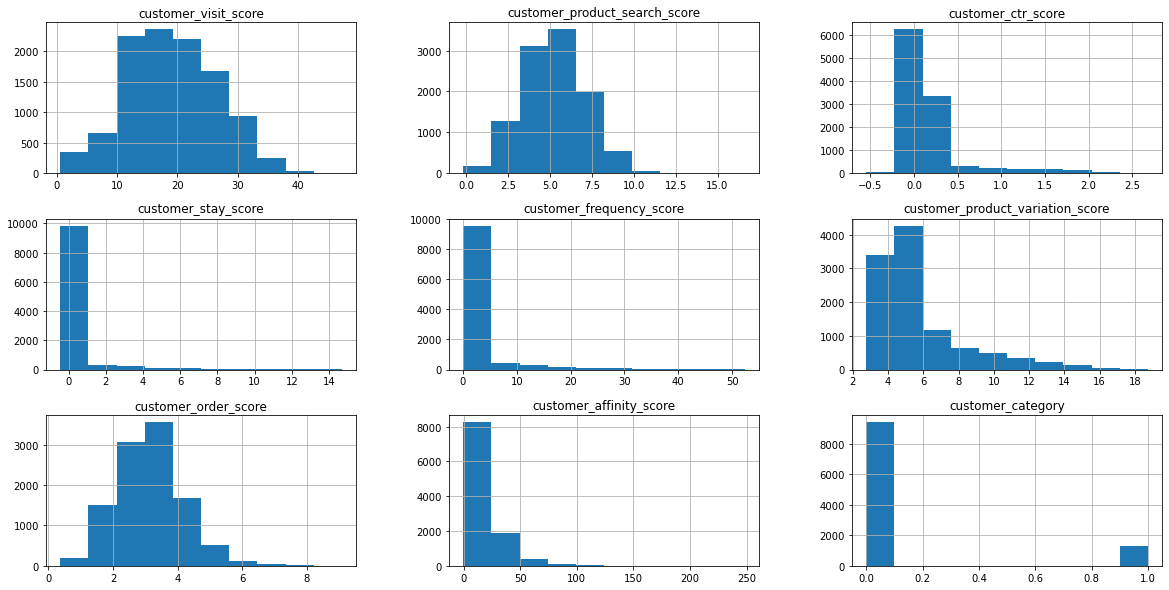

In [11]:
train_df.hist(figsize = (20,10))
plt.show()

Text(0.5, 1.0, 'Customer Active Segment Distribution')

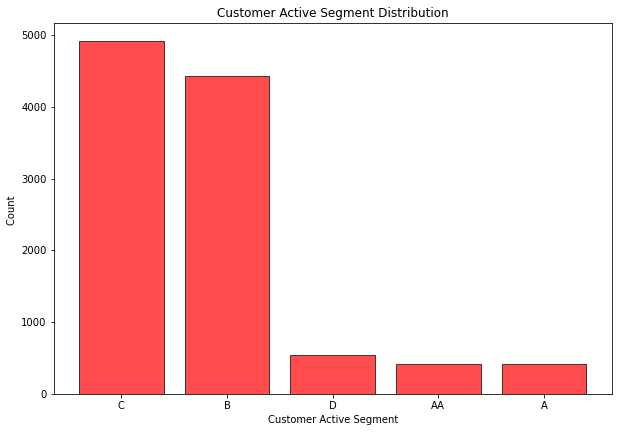

In [12]:
# For categorical variable

plt.figure(figsize=(10,15))

x = train_df.customer_active_segment.value_counts().index
y = [train_df.customer_active_segment.value_counts()[i] for i in x]

plt.subplot(2,1,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Customer Active Segment')
plt.ylabel('Count ')
plt.title('Customer Active Segment Distribution')



In [13]:
# For missing value analysis let's divide the dataset into two parts based on Customer category 
# so that we can remove the rows of the cell with no values in case of customer category 0
# and fill in case of customer category 1

train_df_0 = train_df[train_df.customer_category == 0].copy()
train_df_1 = train_df[train_df.customer_category == 1].copy()

print("Shape of train data with customer category = 0 :", train_df_0.shape)
print("Shape of train data with customer category = 1 :", train_df_1.shape)

Shape of train data with customer category = 0 : (9443, 12)
Shape of train data with customer category = 1 : (1295, 12)


In [14]:
# Feature Customer Active Segment
train_df_0 = train_df_0.dropna(subset = ['customer_active_segment'])
train_df_1.customer_active_segment.fillna( train_df_1.customer_active_segment.mode().iloc[0], inplace = True)
print("Shape of train data with customer category = 0 :", train_df_0.shape)
print("Shape of train data with customer category = 1 :", train_df_1.shape)

Shape of train data with customer category = 0 : (9422, 12)
Shape of train data with customer category = 1 : (1295, 12)


In [15]:
# Feature X1 similar to previous feature we will remove from 0 and fill in 1
train_df_0 = train_df_0.dropna(subset = ['X1'])
train_df_1.X1.fillna( train_df_1.X1.mode().iloc[0], inplace = True)
print("Shape of train data with customer category = 0 :", train_df_0.shape)
print("Shape of train data with customer category = 1 :", train_df_1.shape)

Shape of train data with customer category = 0 : (9389, 12)
Shape of train data with customer category = 1 : (1295, 12)


In [16]:
#  For all numerical features we can simply fill mean
train_df_0.fillna(train_df_0.mean(), inplace = True)
train_df_1.fillna(train_df_1.mean(), inplace = True)

In [17]:
# Concatenating train_df_0 and train_df_1 and forming new train_df
train_df = pd.DataFrame()
train_df = pd.concat([train_df_0, train_df_1])
print(train_df.isna().sum())
print(train_df.shape)

customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
customer_category                   0
dtype: int64
(10684, 12)


<AxesSubplot:>

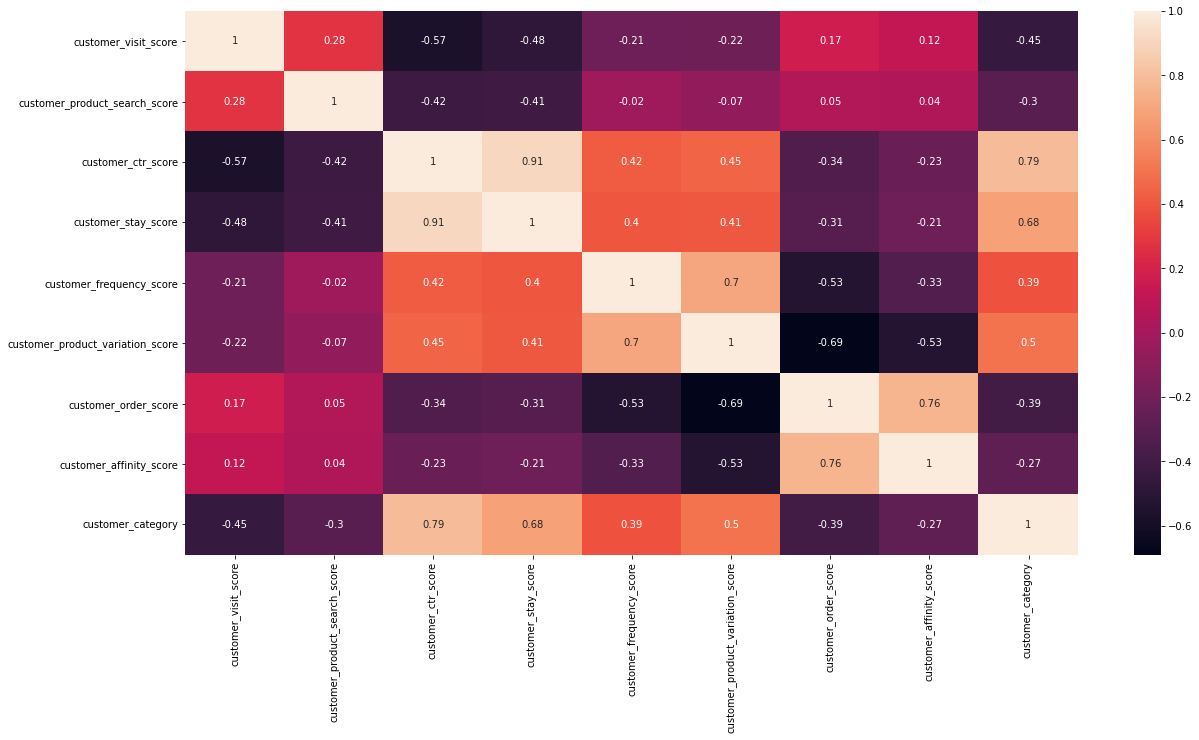

In [18]:
# Now lets check if correlation got impacted or not
plt.figure(figsize = (20,10))
sns.heatmap(np.round(train_df.corr(method='pearson', min_periods=1),2), annot = True)



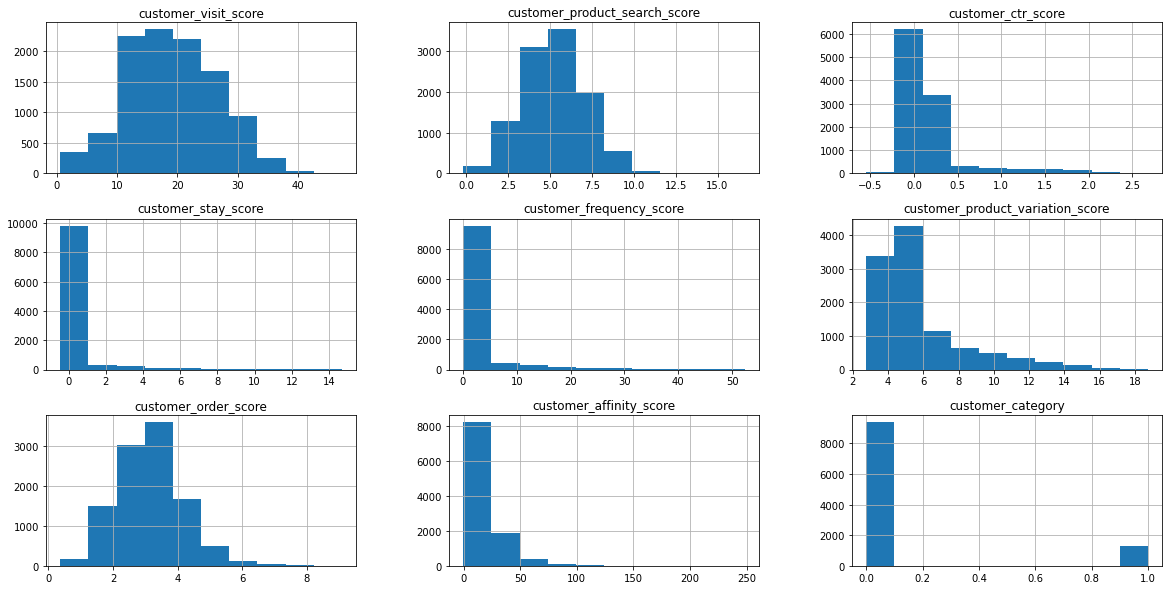

In [19]:
train_df.hist(figsize = (20,10))
plt.show()

Text(0.5, 1.0, 'Customer Active Segment Distribution')

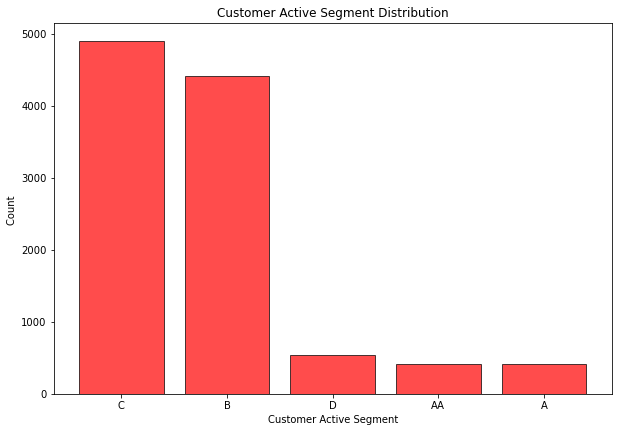

In [20]:
plt.figure(figsize=(10,15))

x = train_df.customer_active_segment.value_counts().index
y = [train_df.customer_active_segment.value_counts()[i] for i in x]

plt.subplot(2,1,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Customer Active Segment')
plt.ylabel('Count ')
plt.title('Customer Active Segment Distribution')


###  DataVisualisation with multiple variables

    Data columns : 'customer_id', 'customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_active_segment', 'X1',
       'customer_category'


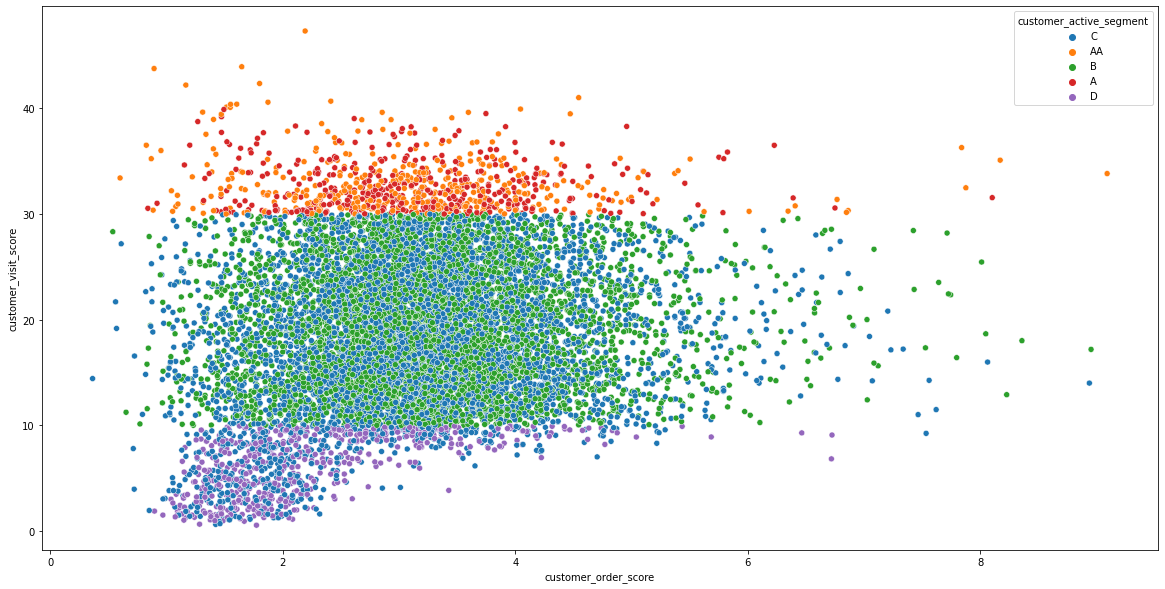

In [21]:
plt.figure(figsize = (20,10))
sns.scatterplot(y= 'customer_visit_score', x= 'customer_order_score', 
                hue = 'customer_active_segment', data = train_df)
plt.show()

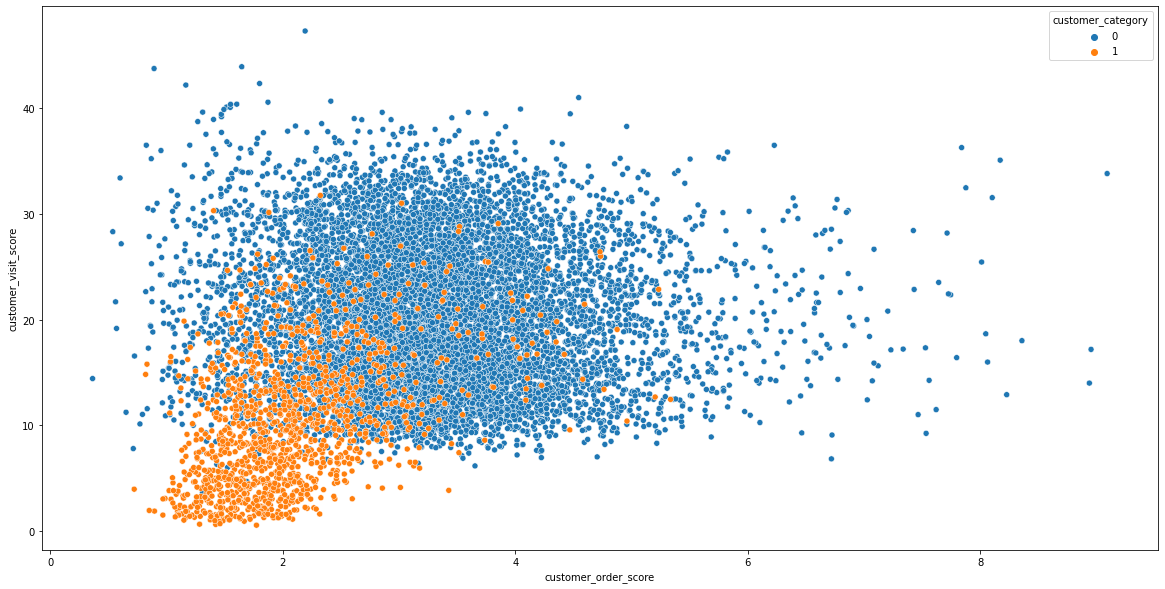

In [22]:
plt.figure(figsize = (20,10))
sns.scatterplot(y= 'customer_visit_score', x= 'customer_order_score', 
                hue = 'customer_category', data = train_df)
plt.show()

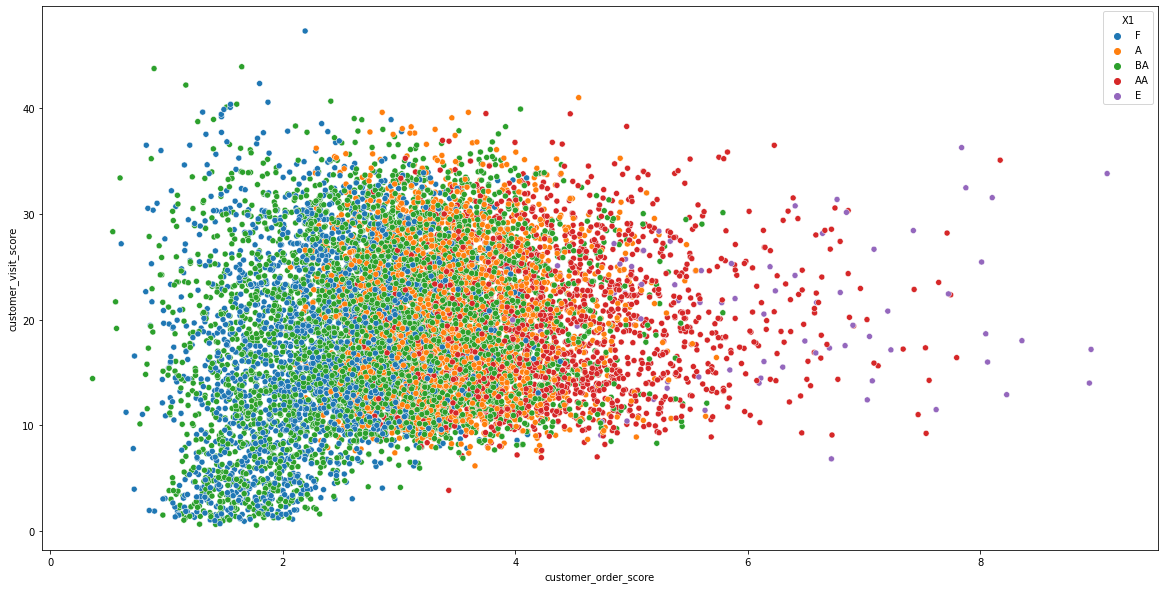

In [23]:
plt.figure(figsize = (20,10))
sns.scatterplot(y= 'customer_visit_score', x= 'customer_order_score', 
                hue = 'X1', data = train_df)
plt.show()

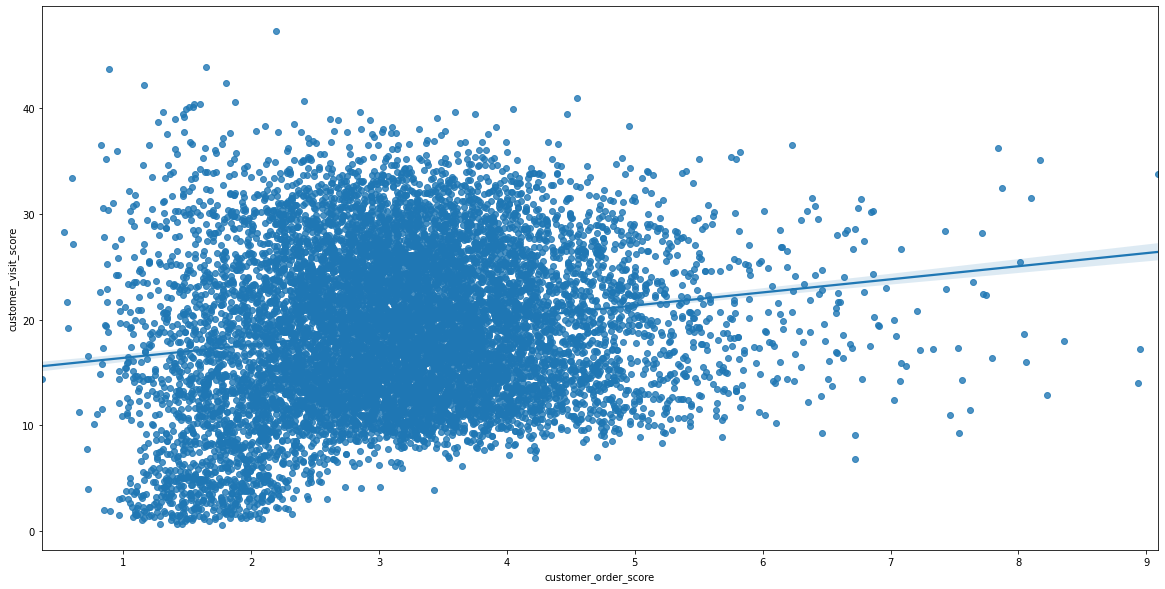

In [24]:
plt.figure(figsize = (20,10))
sns.regplot(y= 'customer_visit_score', x= 'customer_order_score', data=train_df)
plt.show()

From the above 4 plots following things get clear up:
1. Customers with increasing visit score changes active segment of customers from D, C, B to A and AA and as for order score except D all have similar distribution 
2. With increase in visit score and order score number of customers in category 0 decreases and category 1 increases 
3. With increase in order score given uniform visit score the loyalty of customer feature changes from BA, F, A, AA and then to E 
4. With increase in customer visit score order score also increases

<AxesSubplot:xlabel='customer_order_score', ylabel='customer_affinity_score'>

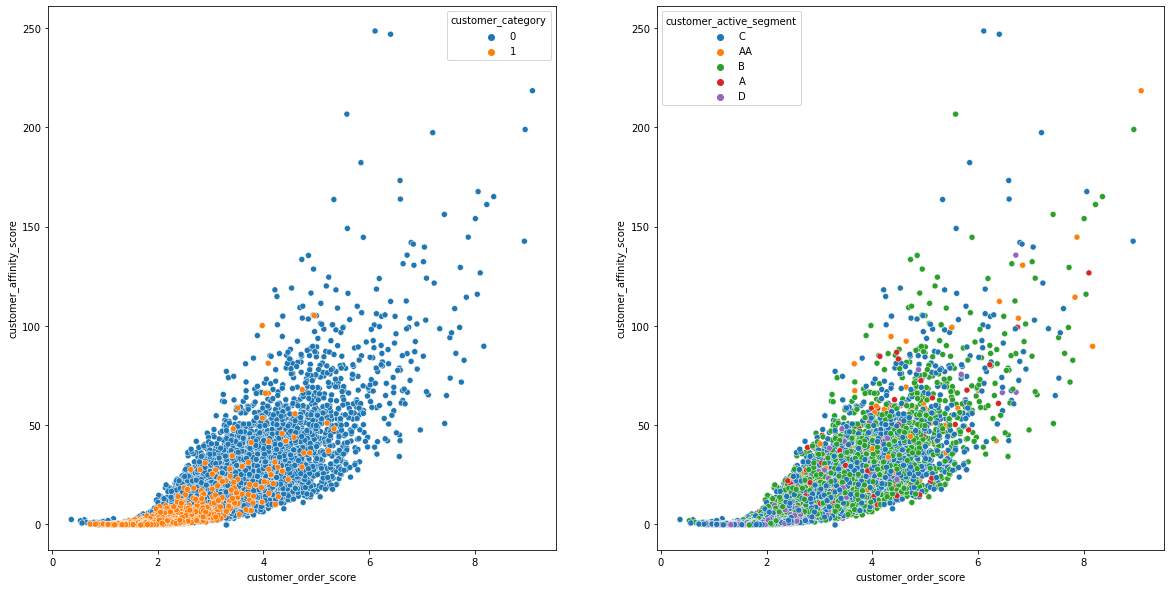

In [25]:
# Plotting 

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.scatterplot(y= 'customer_affinity_score', x= 'customer_order_score', 
                hue = 'customer_category', data = train_df)
plt.subplot(1,2,2)
sns.scatterplot(y= 'customer_affinity_score', x= 'customer_order_score', 
                hue = 'customer_active_segment', data = train_df)


<AxesSubplot:xlabel='customer_order_score', ylabel='customer_frequency_score'>

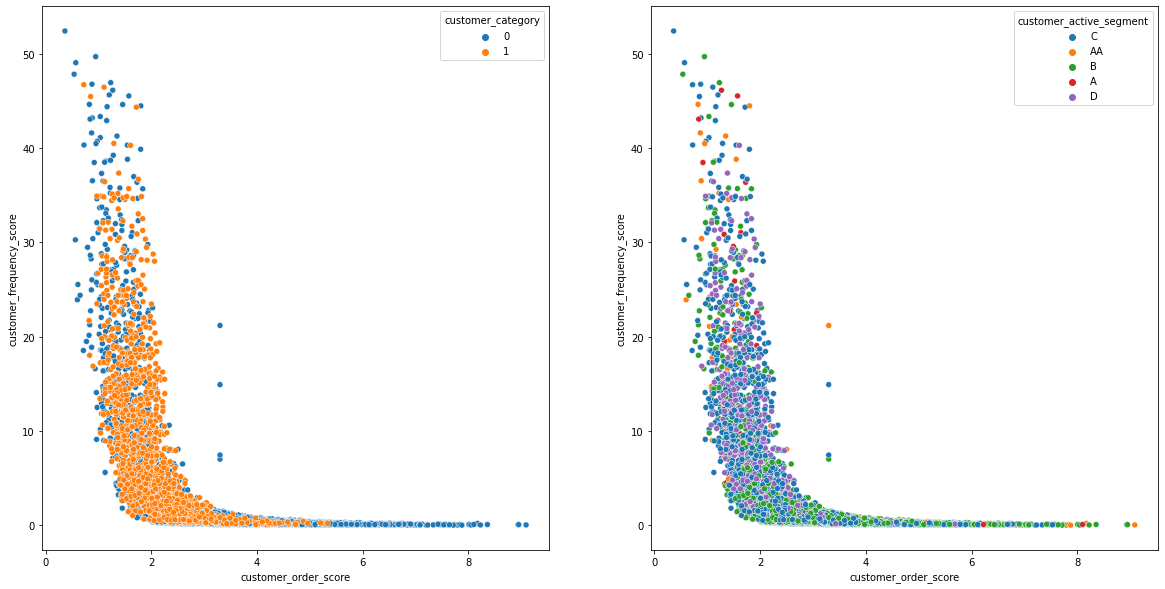

In [26]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.scatterplot(y= 'customer_frequency_score', x= 'customer_order_score', 
                hue = 'customer_category', data = train_df)
plt.subplot(1,2,2)
sns.scatterplot(y= 'customer_frequency_score', x= 'customer_order_score', 
                hue = 'customer_active_segment', data = train_df)

<AxesSubplot:xlabel='customer_order_score', ylabel='customer_stay_score'>

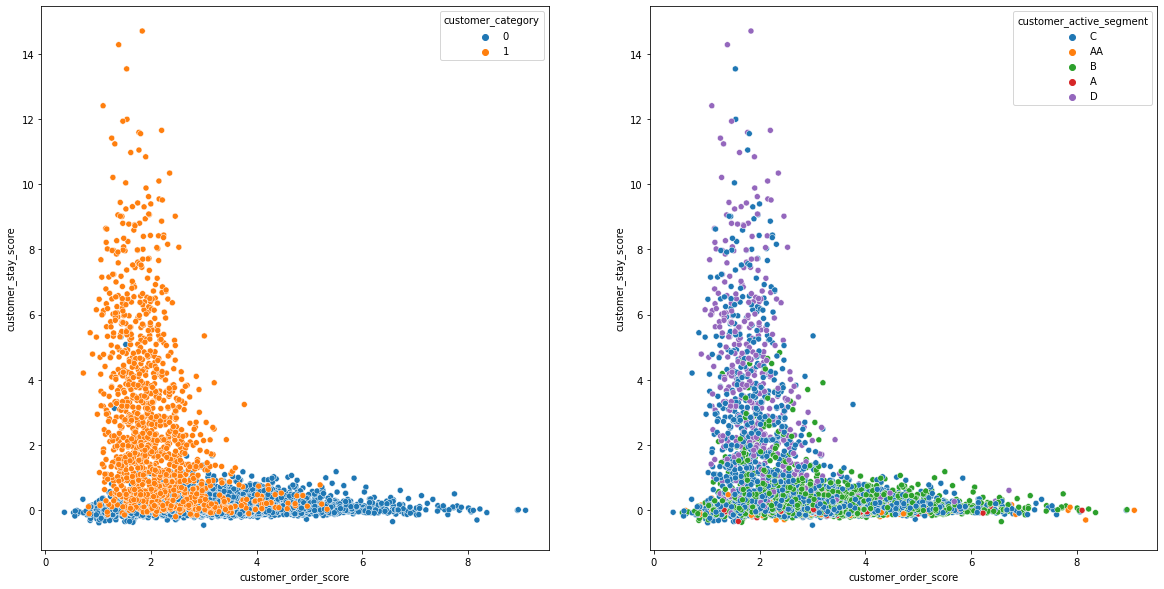

In [27]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.scatterplot(y= 'customer_stay_score', x= 'customer_order_score', 
                hue = 'customer_category', data = train_df)
plt.subplot(1,2,2)
sns.scatterplot(y= 'customer_stay_score', x= 'customer_order_score', 
                hue = 'customer_active_segment', data = train_df)

    Based on the above plots its clear that with the increase in the stay score decreases drastically explaining the fact 
    the more you order the lesser you need to stay in the website after that similar goes with the frequency with which 
    customer visits as it will also decrease with increase in number of orders as there requirement got fulfilled However
    the more the customer orders (order score) the more chances becomes that it will come back later (affinity score)

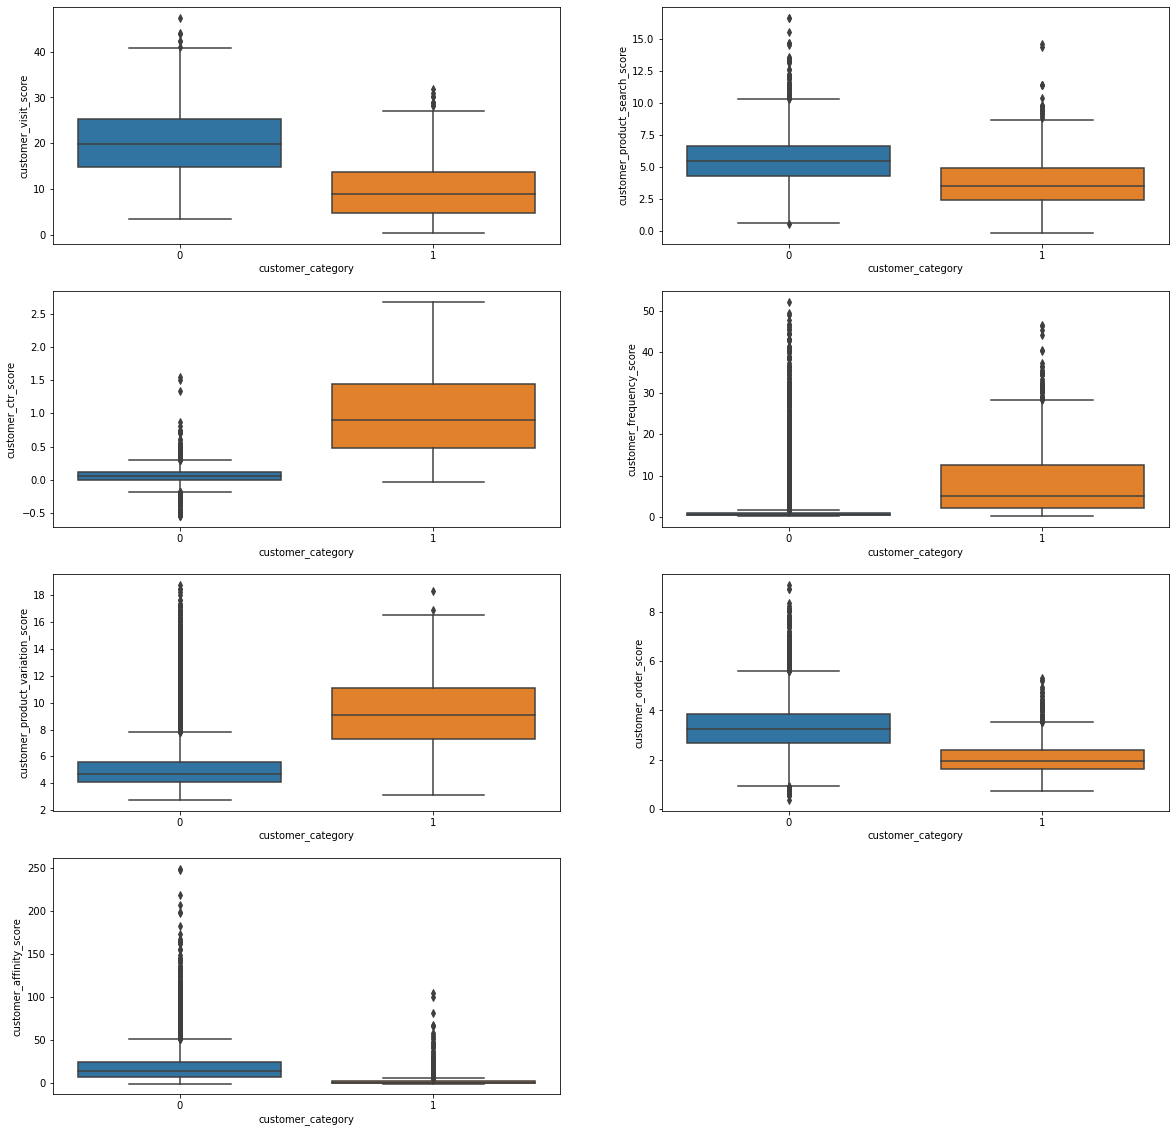

In [39]:
plt.figure(figsize = (20,20))
feature = ['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score']
for i in range(7):
    plt.subplot(4,2,(i+1))
    sns.boxplot(x='customer_category', y = feature[i], data = train_df)

Based on the box plot it can be inferred that there is difference in mean of scores for different customer category and there might be few outliers which could have been considered

###    Training model with the train Dataset and predicting the customer category with test dataset

In [28]:
from sklearn.preprocessing import LabelEncoder
features  = ['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_active_segment', 'X1']
test_df.fillna(test_df.mean(), inplace = True)
test_df.customer_active_segment.fillna( test_df.customer_active_segment.mode().iloc[0], inplace = True)
test_df.X1.fillna( test_df.X1.mode().iloc[0], inplace = True)
test_df.isna().sum()
# Since ctr score is closely related to stay score and stay score has lower ctr score
# so included ctr score and removed stay score
lc = LabelEncoder()
train_df['customer_active_segment'] = lc.fit_transform(train_df.customer_active_segment)
train_df['X1'] = lc.fit_transform(train_df.X1)
test_df['customer_active_segment'] = lc.fit_transform(test_df.customer_active_segment)
test_df['X1'] = lc.fit_transform(test_df.X1)

In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_df[features], train_df.customer_category)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
submission = pd.DataFrame()
submission['customer_id'] = test_df['customer_id']

In [31]:
submission['customer_category'] = logreg.predict(test_df[features])

In [32]:
submission

,customer_id,customer_category
0,csid_10739,0
1,csid_10740,0
2,csid_10741,0
3,csid_10742,0
4,csid_10743,0
...,...,...
7155,csid_17894,0
7156,csid_17895,0
7157,csid_17896,0
7158,csid_17897,0


In [33]:
submission.to_csv("Submission.csv", index = False)